In [40]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import seaborn as sbn
import plotly.graph_objs as go
import plotly.offline as py


In [2]:
df = pd.read_csv('Sheet_1.csv', encoding='latin-1')
df.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [3]:
df.drop(["Unnamed: 3","Unnamed: 4","Unnamed: 5",
           "Unnamed: 6","Unnamed: 7",], axis = 1, inplace =True)
df = pd.concat([df["class"],df["response_text"]], axis = 1)

df.dropna(axis=0, inplace =True)
df.head(10)

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
5,not_flagged,a couple of years ago my friends was going to ...
6,flagged,Roommate when he was going through death and l...
7,flagged,i've had a couple of friends (you could say mo...
8,not_flagged,Listened to someone talk about relationship tr...
9,flagged,I will always listen. I comforted my sister wh...


In [4]:
df['class'].value_counts()

class
not_flagged    55
flagged        25
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

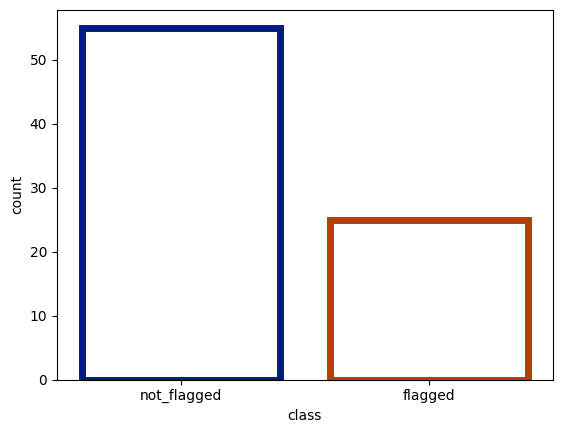

In [8]:
sbn.countplot(x='class', data=df ,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

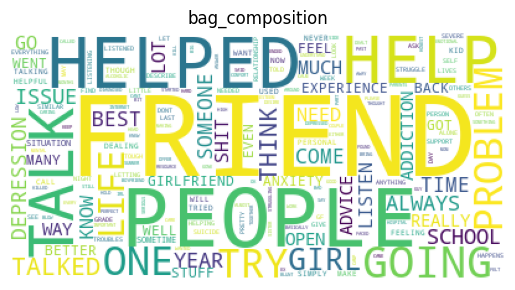

In [7]:
def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("bag_composition")

wordcloud(df['response_text'])

In [5]:
dff = pd.read_csv('Sheet_2.csv', encoding='latin-1')
dff.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [6]:
dff['class'].value_counts()

class
not_flagged    92
flagged        33
Name: count, dtype: int64

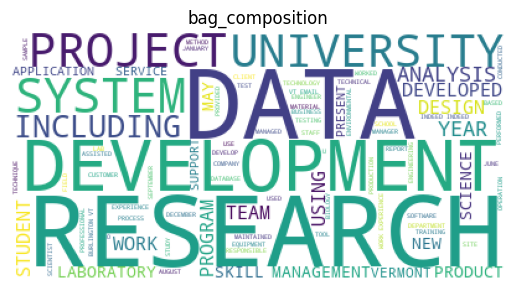

In [10]:
wordcloud(dff['resume_text'])

In [7]:
df['Label'] = Encode.fit_transform(df['class'])

In [8]:
df['Label'].value_counts()

Label
1    55
0    25
Name: count, dtype: int64

In [13]:
df.head()

,response_id,class,response_text,Label
0,response_1,not_flagged,I try and avoid this sort of conflict,1
1,response_2,flagged,Had a friend open up to me about his mental ad...,0
2,response_3,flagged,I saved a girl from suicide once. She was goin...,0
3,response_4,not_flagged,i cant think of one really...i think i may hav...,1
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,1


In [9]:
x = df.response_text
y = df.Label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=28)

In [10]:
NB = MultinomialNB()
tfid = TfidfVectorizer()
vect = CountVectorizer()

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60,), (20,), (60,), (20,))

In [13]:
x_train.head()

78    My now girlfriend used to have serious addicti...
67    I haven't really met anyone dealing with atten...
63    When my friend needed help when she was going ...
38    One of my best friends was diagnosed with canc...
30       I am a high school teacher so almost everyday.
Name: response_text, dtype: object

In [12]:
y_train.head()

78    0
67    1
63    1
38    0
30    1
Name: Label, dtype: int32

In [14]:
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [15]:
NB.fit(x_train,y_train)

MultinomialNB()

In [16]:
y_predict = NB.predict(x_test)

In [17]:
y_predict

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [18]:
metrics.accuracy_score(y_test, y_predict)

0.65

In [19]:
rf = RandomForestClassifier(max_depth=10, max_features=10)
rf.fit(x_train,y_train)
rfpredict = rf.predict(x_test)
metrics.accuracy_score(y_test, rfpredict)

0.8

Regular Expression¶

In [20]:
df["class"] = [1 if each == "flagged" else 0 for each in df["class"]]
df.head()

,class,response_text,Label
0,0,I try and avoid this sort of conflict,1
1,1,Had a friend open up to me about his mental ad...,0
2,1,I saved a girl from suicide once. She was goin...,0
3,0,i cant think of one really...i think i may hav...,1
4,0,Only really one friend who doesn't fit into th...,1


In [21]:
df = pd.concat([df["class"],df["response_text"]], axis = 1)

df.dropna(axis=0, inplace =True)
df.head(10)

,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...
5,0,a couple of years ago my friends was going to ...
6,1,Roommate when he was going through death and l...
7,1,i've had a couple of friends (you could say mo...
8,0,Listened to someone talk about relationship tr...
9,1,I will always listen. I comforted my sister wh...


In [22]:
df.response_text[8]

'Listened to someone talk about relationship troubles. Offered some advice from personal experience.'

In [43]:
first_text = df.response_text[8]
text = re.sub("[^a-zA-Z]"," ",first_text)
text = text.lower() 
print(text)

listened to someone talk about relationship troubles  offered some advice from personal experience 


Irrelevant Words (Stopwords)

In [46]:
import nltk
import re
from nltk.corpus import stopwords

words = nltk.word_tokenize(text)
filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
print(filtered_words)

['listened', 'someone', 'talk', 'relationship', 'troubles', 'offered', 'advice', 'personal', 'experience']


Lemmatization

In [47]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text = [(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a")) for word in filtered_words]
print(filtered_words)

['listened', 'someone', 'talk', 'relationship', 'troubles', 'offered', 'advice', 'personal', 'experience']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


All Words

In [48]:
description_list = []
for description in df.response_text:
       
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower() 
    
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    
    lemmatizer = WordNetLemmatizer()
    description = (lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a") for word in description)
    
    description = " ".join(description)
    description_list.append(description)

In [49]:
description_list[8]

'listen someone talk relationship trouble offer advice personal experience'

Bag of Words

In [50]:
cv = CountVectorizer()
max_features = 100
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
print("Top {} Most Used Words: {}".format(max_features,count_vectorizer.get_feature_names_out()))


Top 100 Most Used Words: ['addiction' 'advice' 'alone' 'always' 'anxiety' 'anything' 'back' 'best'
 'bring' 'call' 'care' 'come' 'comfort' 'could' 'deal' 'depression'
 'describe' 'dont' 'end' 'even' 'everything' 'experience' 'face' 'feel'
 'find' 'friend' 'get' 'gf' 'girl' 'girlfriend' 'give' 'go' 'good' 'grade'
 'happen' 'help' 'helpful' 'issue' 'kid' 'kill' 'know' 'last' 'let' 'life'
 'like' 'listen' 'little' 'look' 'lot' 'make' 'many' 'may' 'much' 'need'
 'never' 'night' 'offer' 'often' 'one' 'open' 'others' 'people' 'person'
 'personal' 'pretty' 'problem' 'really' 'relationship' 'say' 'school'
 'see' 'self' 'severe' 'share' 'shit' 'similar' 'simply' 'situation'
 'someone' 'sometimes' 'start' 'struggle' 'stuff' 'suicide' 'support'
 'talk' 'tell' 'think' 'though' 'time' 'trouble' 'try' 'use' 'want' 'way'
 'week' 'well' 'work' 'would' 'year']


Naive Bayes

In [51]:
y = df.iloc[:,0].values
x = sparce_matrix

Train Test Split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [23]:
print(y)

0     1
1     0
2     0
3     1
4     1
     ..
75    1
76    0
77    1
78    0
79    1
Name: Label, Length: 80, dtype: int32


Random Forest

In [33]:
x = df.response_text
y = df.Label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.7

In [34]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.8

In [35]:
df_Text = df["response_text"]
len(df_Text)

80

In [36]:
Tf_idf = CountVectorizer(max_features=256).fit_transform(df_Text.values)

In [38]:
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=250,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.128s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.119036
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 104.6108932, gradient norm = 0.1217900 (50 iterations in 0.040s)
[t-SNE] Iteration 100: error = 107.4311371, gradient norm = 0.1784759 (50 iterations in 0.032s)
[t-SNE] Iteration 150: error = 114.9584122, gradient norm = 0.1441077 (50 iterations in 0.032s)
[t-SNE] Iteration 200: error = 127.8238449, gradient norm = 0.1019337 (50 iterations in 0.024s)
[t-SNE] Iteration 250: error = 133.9949188, gradient norm = 0.2354852 (50 iterations in 0.025s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 133.994919
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382